### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [31]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [32]:
df = pd.read_csv(r"C:\Users\suert\OneDrive\Documentos\GitHub\Machine_Learning\2-No_Supervisado\3-Clustering\Practica\data\drugLibTrain_raw.tsv",sep="\t")

In [33]:
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [35]:
df_numericas = df.select_dtypes(include=['int', 'float'])
df_categoricas = df.select_dtypes(include=['object'])
df_categoricas_menos_10 = df_categoricas.loc[:, df_categoricas.nunique() < 10]
df_final = pd.concat([df_numericas, df_categoricas_menos_10], axis=1)

In [36]:
df_final.head()

,Unnamed: 0,rating,effectiveness,sideEffects
0,2202,4,Highly Effective,Mild Side Effects
1,3117,1,Highly Effective,Severe Side Effects
2,1146,10,Highly Effective,No Side Effects
3,3947,3,Marginally Effective,Mild Side Effects
4,1951,2,Marginally Effective,Severe Side Effects


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [37]:
df_final['effectiveness'] = df_final['effectiveness'].replace ({"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4})

In [41]:
df_final['sideEffects'] = df_final['sideEffects'].replace ({"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4})

In [42]:
df_final.head()

,Unnamed: 0,rating,effectiveness,sideEffects,sideEfects
0,2202,4,4,1,1
1,3117,1,4,3,3
2,1146,10,4,0,0
3,3947,3,1,1,1
4,1951,2,1,3,3


In [45]:
df_dummies = pd.get_dummies(df)


In [46]:
df_dummies.head()

,Unnamed: 0,rating,urlDrugName_abilify,urlDrugName_accolate,urlDrugName_accupril,urlDrugName_accutane,urlDrugName_aciphex,urlDrugName_actiq,urlDrugName_actonel,urlDrugName_actos,...,"commentsReview_while on the tablets - made sure i stayed out of the sun, tried to not drink alcahol and had liver checked. And ensured i did not pregnant",commentsReview_while taking it did a good job decreasing appetite but when it was stopped appetite increased substatially.,"commentsReview_while the drug helped with the swelling, it did take a little longer than expected, yet i did have swelling on my cheek and my gums. the drug definitely didn't seem to help with the pain, i needed something stronger to go along with the nabumetone.","commentsReview_while this product worked for a limited time, I have found another product that works 24/7. This is an isotonic product (2 oz drink)that goes directly to the blood stream and among many other benefits dramatically reduces allergy symptoms. http://www.marketamerica.com/topproducts-13009/isotonix-opc3.htm\r\r\nI have no side effects from this treatment",commentsReview_will need to go back to dr. for another perscription. It's my fault..should never have agreed to take something new. Had simialr reaction to Augmentin.,"commentsReview_with nasacort it is usually taken on a daily or semi dailhy basis. if applied correctly i can go two weeks without using this very expensive medicine.\r\r\nVicodin is only taken when i experience headaches which i am told has nothing to do with my perenniel rhinitis... It works best if I take it as soon as i experience the apparent signs of a headache.. then, i don't usually have to continue taking it at the prescribed dosages of every 4 to six hours.. i have been taking vicodin or the generic for more than 10 years...i do not take in at night because it seems to cause insomnia.",commentsReview_with vicodin i take it at the sign of a headache so that i do not have to take it every 4 to six house.. i never take it at night because it causes insomnia,"commentsReview_within 48 hr I experience extreme abdominal pain. I developed C.Difficile and was in agony.\r\r\nIt wiped out all the good bacteria in my system and I also developed drug induced pneumonia.\r\r\nSubsequently I was given other antibiotics to combat the pneumonia and I became so dilirious that I almost died.\r\r\n\r\r\nps Also, I am allergic to PCN.--anaphylactic shock.",commentsReview_you get a 3 ml eye drop bottle & use 1-2 drops 2-3 x a day until it goes away. I still have half a bottle left.,commentsReview_you put one drop on the wand they provide you and aplly to the upper lash base line only once a night. Only once a day no need to put more than that. Only one drop too.
0,2202,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3117,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1146,10,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3947,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1951,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [47]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [49]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


for k in range(2, 21):
    
    kmeans = KMeans(n_clusters=k, random_state=42)
  
    labels = kmeans.fit_predict(df_dummies)
    
    score = silhouette_score(df_dummies, labels)
    print(f"Silhouette score para k={k}: {score}")

c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=2: 0.6212827711768687


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=3: 0.5879418817873755


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=4: 0.5669094377184252


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=5: 0.5610722631179921


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=6: 0.5573202591468773


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=7: 0.5489978607549998


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=8: 0.547991058232782


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=9: 0.5456974329305763


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=10: 0.5437777509972895


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=11: 0.534937095646487


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=12: 0.5333529579198746


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=13: 0.52981458511602


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=14: 0.5295688352979194


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=15: 0.5286299475624315


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=16: 0.5325421314943832


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=17: 0.5356409235754489


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=18: 0.5353933379695829


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=19: 0.5344825252413304


c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=20: 0.5294864118873215


Mayor silhouette scores con K=2

In [50]:

kmeans = KMeans(n_clusters=2, random_state=42)

labels = kmeans.fit_predict(df_dummies)

score = silhouette_score(df_dummies, labels)
print(f"Silhouette score para k=2: {score}")

c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score para k=2: 0.6212827711768687


Con el Elbow method comprobamos que k=2 sería la opción más adecuada

c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\suert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

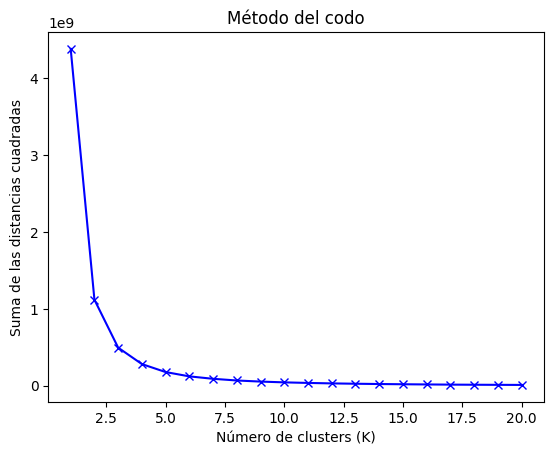

In [51]:
sum_of_squared_distances = []


for k in range(1, 21):
  
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    kmeans.fit(df_dummies)
    
    sum_of_squared_distances.append(kmeans.inertia_)


plt.plot(range(1, 21), sum_of_squared_distances, 'bx-')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Suma de las distancias cuadradas')
plt.title('Método del codo')
plt.show()

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

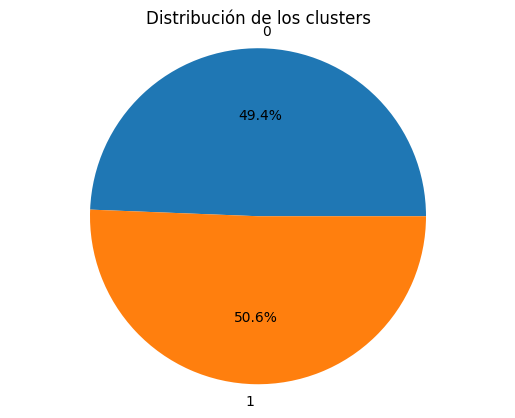

In [53]:
unique_labels, counts = np.unique(labels, return_counts=True)


plt.pie(counts, labels=unique_labels, autopct='%1.1f%%')
plt.axis('equal') 
plt.title('Distribución de los clusters')
plt.show()